In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

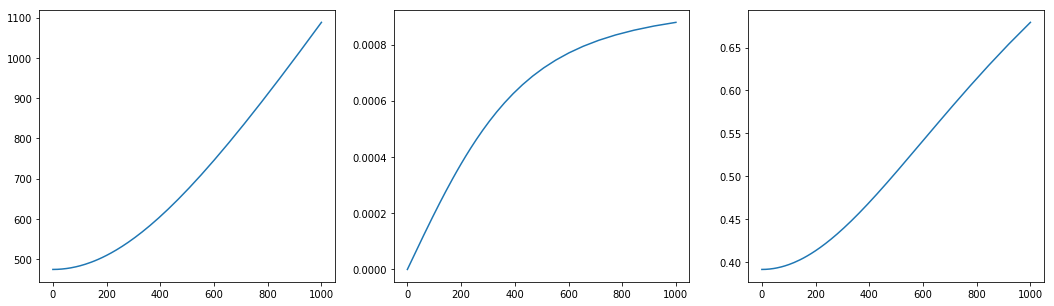

In [109]:
local_temperature_k = 298
_gas_mass_amu = 28
kg_amu = 1.66048e-27
_sigma_m2 = 4.3e-19
ion_time_step = 1e-6
k = 1.3806505e-23
local_pressure_pa = 10.0

def mfp(speed_ion):
    # Compute mean gas speed (m/s)
    c_bar_gas = np.sqrt(8*k*local_temperature_k/np.pi/(_gas_mass_amu * kg_amu))

    # Compute median gas speed (m/s)
    c_star_gas = np.sqrt(2*k*local_temperature_k/(_gas_mass_amu * kg_amu))

    #Compute mean relative speed (mm/us) between gas and ion.
    s = speed_ion / c_star_gas
    c_bar_rel = c_bar_gas * ((s + 1/(2*s)) * 0.5 * np.sqrt(np.pi) * erf(s) + 0.5 * np.exp(-s*s))

    #Compute mean-free-path (mm)
    effective_mean_free_path_m = k * local_temperature_k * (speed_ion / c_bar_rel) / (local_pressure_pa * _sigma_m2)

    collision_prob = 1 - np.exp(- speed_ion * ion_time_step / effective_mean_free_path_m)
        
    return( effective_mean_free_path_m, collision_prob, c_bar_rel)

ion_speeds = np.logspace(-8,3,300)
res = [mfp(vi) for vi in ion_speeds]
mfps = np.array([r[0] for r in res])
cp = np.array([r[1] for r in res])
c_bar_rel = np.array([r[2] for r in res])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(ion_speeds,c_bar_rel)

plt.subplot(1,3,2)
plt.plot(ion_speeds,mfps)

plt.subplot(1,3,3)
plt.plot(ion_speeds,cp)



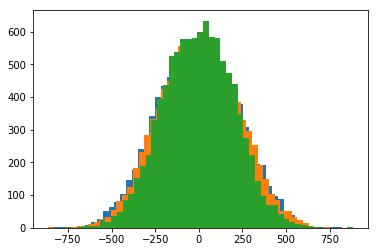

In [110]:
vrStdevGas = 200

def random_mb_sample(vFrameMeanBackRest, scaleFct):
    vRelIonMeanBackRest = np.linalg.norm(vFrameMeanBackRest)
    vGasParticleUpperScale = vRelIonMeanBackRest + vrStdevGas * scaleFct
    
    vGasParticle = np.array([0.0,0.0,0.0])   
    vGasParticleMagnitude = 0.0
    
    while(np.random.random_sample() >= (vGasParticleMagnitude / vGasParticleUpperScale)):
        vGasParticle = np.random.randn(3) * vrStdevGas
        vGasParticleMagnitude = np.linalg.norm(vGasParticle - vFrameMeanBackRest)

        
    return(vGasParticle)
        
    
def sample_mb(n_samples,vion,scalef):
    samples = [random_mb_sample(vion,scalef) for i in range(n_samples)]
    
    xi = [smp[0] for smp in samples]
    yi = [smp[1] for smp in samples]
    zi = [smp[2] for smp in samples]
    
    plt.hist(xi, bins = 50)
    
    
vi = np.array([10.0,0.0,0.0])
sample_mb(10000, vi, 10.0)
sample_mb(10000, vi, 3.0)
sample_mb(10000, vi, 1.0)